# Galactocentric coordinate plots

In [1]:
from utils import *

# Plot settings
plt.rc(('xtick', 'ytick'), direction='in')
plt.rc('xtick', top=True)
plt.rc('ytick', right=True)
plt.rc('font', family='STIXgeneral')
plt.rc('figure', dpi=140)
plt.rc('figure', figsize=(4, 4))

# Paths
# data_dir = '/users/PAS2055/lodubay/Data/APOGEE'
data_dir = 'C:\\Users\\dubay.11\\OneDrive - The Ohio State University\\Documents\\Docs\\First Year Project\\Data'
# data_dir = '/home/dubay.11/Documents/Data/APOGEE'
data_path = Path(data_dir)

df = import_catalogs(data_path)
ages, low_age = get_discrepant_ages(df, diff_cut=-5)
metals, low_fe = get_discrepant_metallicities(df, diff_cut=-0.5)

Importing APOKASC catalog...
Importing astroNN DR17 catalog...
Importing StarHorse DR17 catalog...
Importing BACCHUS catalog...
Combining datasets...
Cleaning up...
Combining columns...
Done!


## Attempt with StarHorse parameters

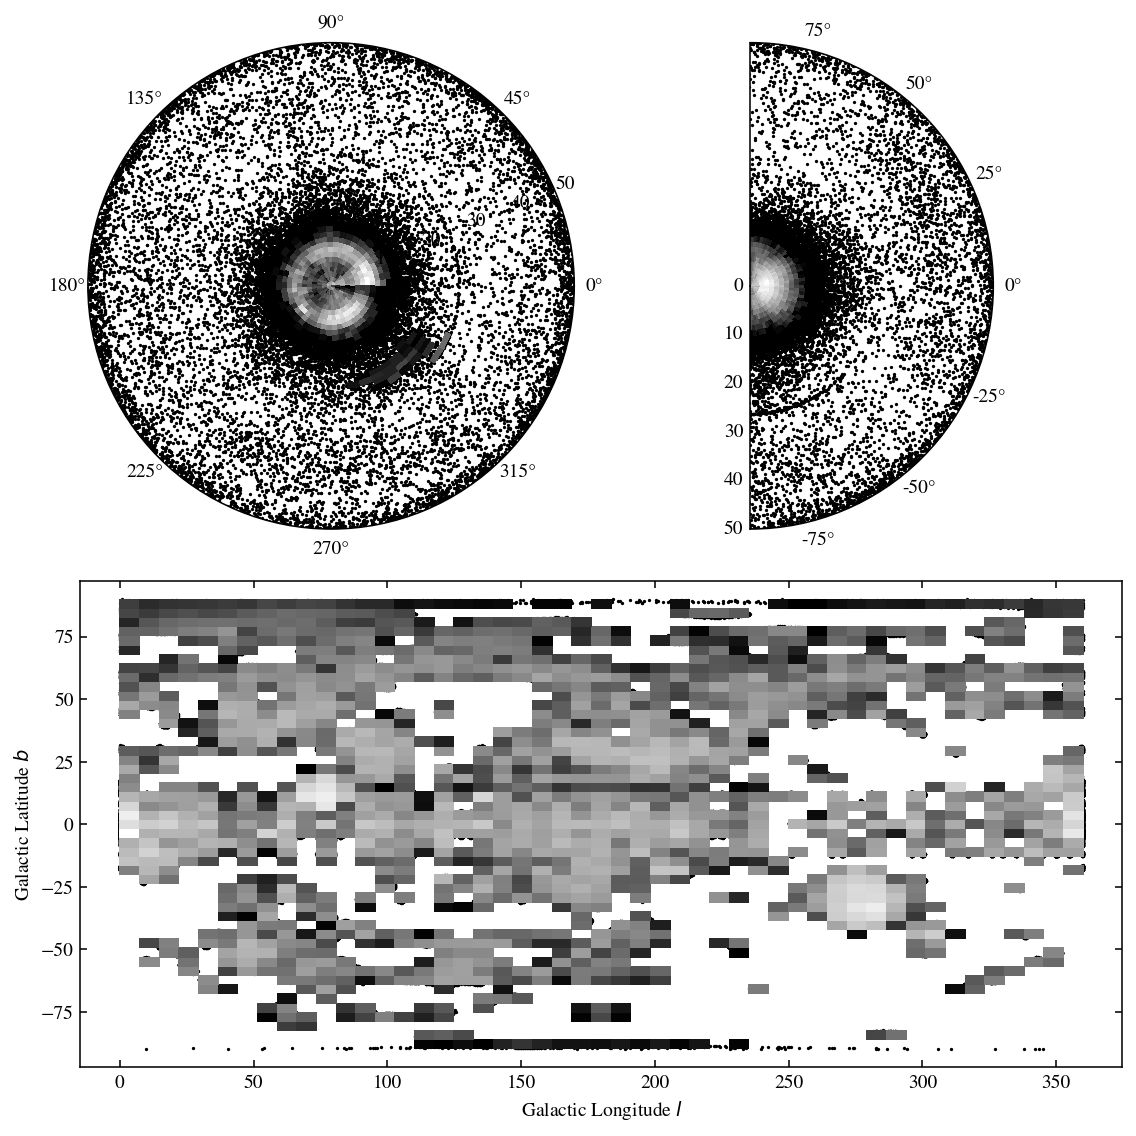

In [2]:
fig = plt.figure(figsize=(8, 8), constrained_layout=True)
rlim = (0, 50)
gs = fig.add_gridspec(2, 2)
ax = fig.add_subplot(gs[0,0], projection='polar')
ax.scatter(df['GLON'], df['STARHORSE_DIST'], c='k', s=.5)
ax.hist2d(df['GLON'], df['STARHORSE_DIST'],
          bins=[np.linspace(0, 2*np.pi, 50, endpoint=True), 
                np.linspace(rlim[0], rlim[1], 50, endpoint=True)],
          cmap='gray', norm=colors.LogNorm(), cmin=10)
ax.set_rlim(rlim)
# print(df['GLON'].max())
# scatter_hist(ax, df['GLON'] * (np.pi / 180), df['STARHORSE_DIST'], xlim=(0, 360))

ax = fig.add_subplot(gs[0,1], projection='polar')
ax.scatter(df['GLAT'], df['STARHORSE_DIST'], c='k', s=.5)
ax.hist2d(df['GLAT'], df['STARHORSE_DIST'],
          bins=[np.linspace(-np.pi/2, np.pi/2, 50, endpoint=True), 
                np.linspace(rlim[0], rlim[1], 50, endpoint=True)],
          cmap='gray', norm=colors.LogNorm(), cmin=10)

ax = fig.add_subplot(gs[1,:])
scatter_hist(ax, df['GLON'], df['GLAT'])
ax.set_xlabel('Galactic Longitude $l$')
ax.set_ylabel('Galactic Latitude $b$')

plt.show()

## Attempt with astroNN coordinates

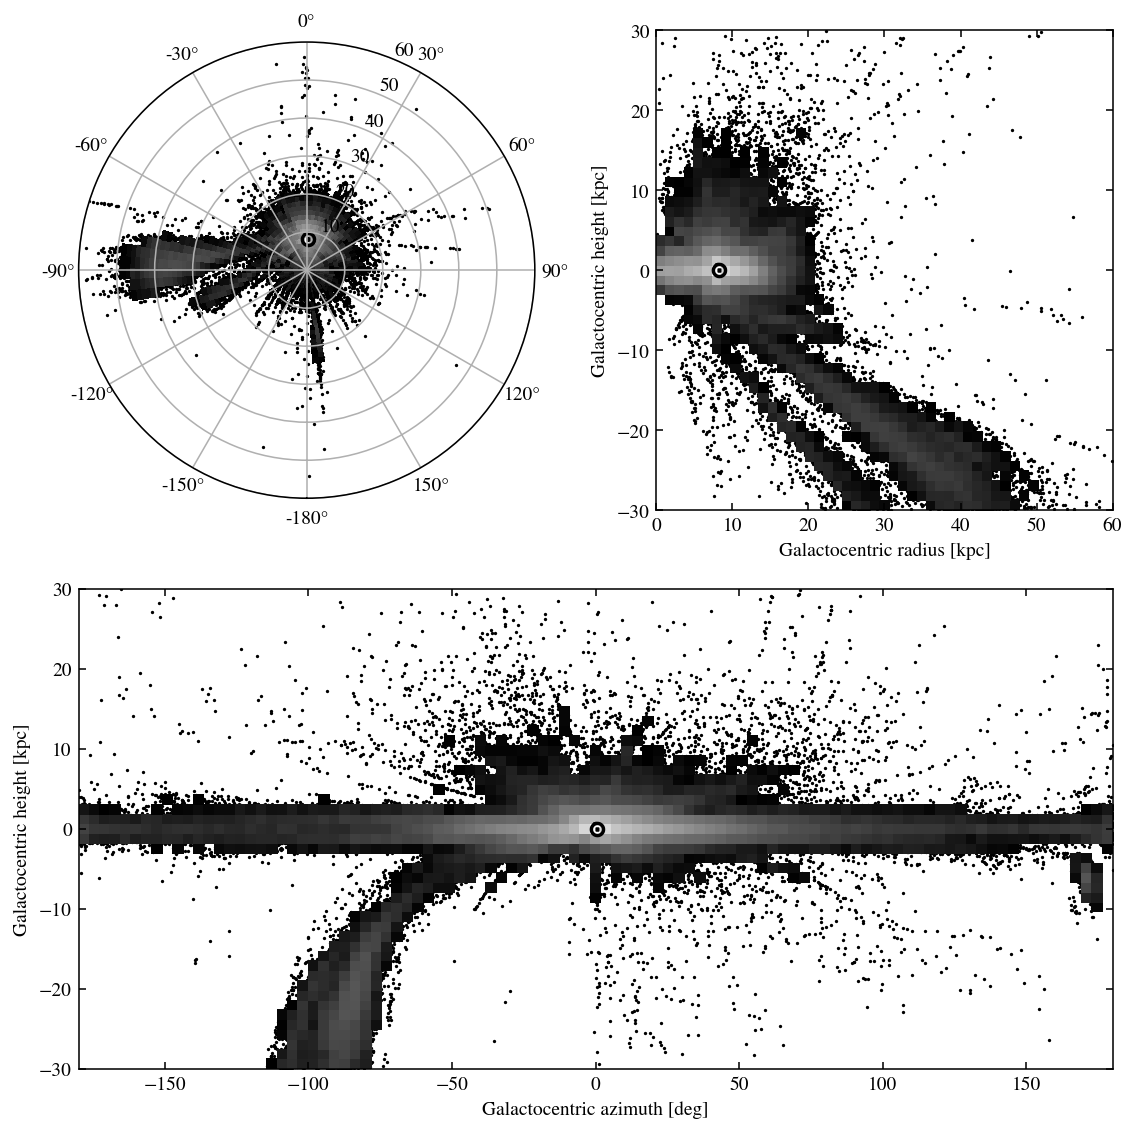

(<Figure size 1120x1120 with 3 Axes>,
 [<PolarAxesSubplot:>,
  <AxesSubplot:xlabel='Galactocentric radius [kpc]', ylabel='Galactocentric height [kpc]'>,
  <AxesSubplot:xlabel='Galactocentric azimuth [deg]', ylabel='Galactocentric height [kpc]'>])

In [111]:
def galplot(df, cols=['ASTRONN_galr', 'ASTRONN_galphi', 'ASTRONN_galz'], 
            rad_lim=(0, 60), lon_lim=(-np.pi, np.pi), lat_lim=(-30, 30), 
            show=True, sun=True, cmap='gray', nbins=50):
    """
    Plot data on galactocentric coordinates.
    
    Parameters
    ----------
    df : DataFrame containing galactocentric coordinates
    cols : list of 3 columns containing [radius, longitude, z-height] data
    rad_lim : Tuple
        plot limits on galactocentric radius in kpc
    lon_lim : Tuple
        plot limits on galactocentric longitude in radians
    lat_lim : ...
    show : bool
        If False, return figure and axes without displaying plot. Default is True
    sun : bool
        If True, plot location of the Sun. Default is True
    nbins : int
        Number of bins per side in 2D histogram
    
    """
    rad_col, lon_col, lat_col = cols
    sun_coords = [8.122, 0, 0.0208] # (rad [kpc], lon [deg], lat [kpc])
    df = df.copy()
    # transform longitude data to radians >= 0 if needed
    if lon_lim[0] >= 0:
        df.loc[df[lon_col] < 0, lon_col] += 2*np.pi
    # limit data to within 3D bounds
    df = df[(df[rad_col] >= rad_lim[0]) & (df[rad_col] <= rad_lim[1])]
    df = df[(df[lon_col] >= lon_lim[0]) & (df[lon_col] <= lon_lim[1])]
    df = df[(df[lat_col] >= lat_lim[0]) & (df[lat_col] <= lat_lim[1])]
    
    fig = plt.figure(figsize=(8, 8), constrained_layout=True)
    axs = []
    gs = fig.add_gridspec(2, 2)
    
    ax = fig.add_subplot(gs[0,0], projection='polar')
    ax.scatter(df[lon_col], df[rad_col], c='k', s=0.5)
    ax.hist2d(df[lon_col], df[rad_col], 
              bins=[np.linspace(lon_lim[0], lon_lim[1], 2*nbins), 
                    np.linspace(rad_lim[0], rad_lim[1], nbins)], 
              cmap=cmap, norm=colors.LogNorm(), cmin=10)
    ax.scatter(sun_coords[1], sun_coords[0], marker=r'$\odot$', color='k', s=64)
    # ax.scatter(low_alpha['ASTRONN_galphi'], low_alpha['ASTRONN_galr'], c='g', s=.6, label='[O/Fe] < -0.5')
    ax.set_rorigin(0)
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
#     ax.set_rmin(rad_lim[0])
#     ax.set_rmax(rad_lim[1])
#     ax.set_rticks([20, 40, 60])
#     ax.set_rlabel_position(120)
#     ax.set_thetamin(0)
#     ax.set_thetamax(360)
#     ax.grid()
    # Set grid spacing based on plotted range
    if lon_lim[1] - lon_lim[0] >= np.pi/2:
        ngrid = 12
    elif lon_lim[1] - lon_lim[0] >= np.pi/3:
        ngrid = 18
    elif lon_lim[1] - lon_lim[0] >= np.pi/6:
        ngrid = 36
    else:
        ngrid = 72
    ax.set_thetagrids(np.linspace(-180, 180, ngrid, endpoint=False))
    ax.grid()
    ax.set_thetamin(lon_lim[0] * 180/np.pi)
    ax.set_thetamax(lon_lim[1] * 180/np.pi)
    axs.append(ax)

    ax = fig.add_subplot(gs[0,1])
    ax.scatter(df[rad_col], df[lat_col], c='k', s=0.5)
    ax.hist2d(df[rad_col], df[lat_col], 
              bins=[np.linspace(rad_lim[0], rad_lim[1], nbins), 
                    np.linspace(lat_lim[0], lat_lim[1], nbins)], 
              cmap=cmap, norm=colors.LogNorm(), cmin=10)
    ax.scatter(sun_coords[0], sun_coords[2], marker=r'$\odot$', color='k', s=64)
    # ax.scatter(low_alpha['ASTRONN_galr'], low_alpha['ASTRONN_galz'], c='g', s=.6)
    ax.set_xlabel('Galactocentric radius [kpc]')
    ax.set_ylabel('Galactocentric height [kpc]')
    axs.append(ax)

    ax = fig.add_subplot(gs[1,:])
    ax.scatter(df[lon_col] * 180/np.pi, df[lat_col], c='k', s=.5)
    ax.hist2d(df[lon_col] * 180/np.pi, df[lat_col], 
              bins=[np.linspace(lon_lim[0] * 180/np.pi, lon_lim[1] * 180/np.pi, 2*nbins), 
                    np.linspace(lat_lim[0], lat_lim[1], nbins)], 
              cmap=cmap, norm=colors.LogNorm(), cmin=10)
    ax.scatter(sun_coords[1], sun_coords[2], marker=r'$\odot$', color='k', s=64)
    # ax.scatter(low_alpha['ASTRONN_galphi'] * 180/np.pi, low_alpha['ASTRONN_galz'], c='g', s=.6)
    ax.set_xlabel('Galactocentric azimuth [deg]')
    ax.set_ylabel('Galactocentric height [kpc]')
    axs.append(ax)
    # fig.legend(loc='upper left')
    if show:
        plt.show()
    return fig, axs

galplot(df)
# galplot(df, lon_lim=(np.pi/4, np.pi/3), rad_lim=(5, 25))

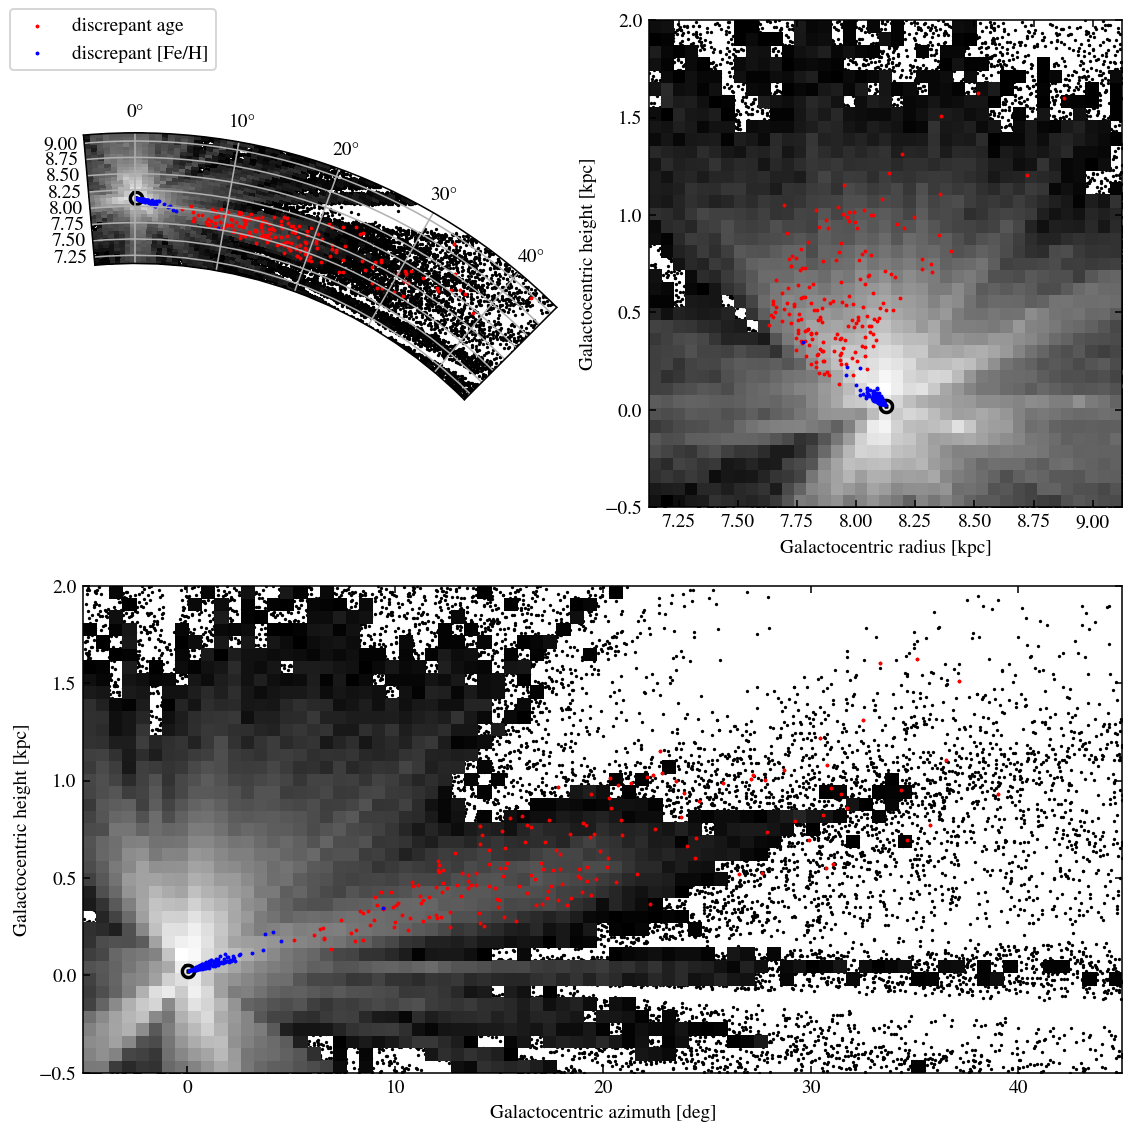

In [114]:
fig, axs = galplot(df, rad_lim=(7.125, 9.125), lon_lim=(-np.pi/36, np.pi/4), lat_lim=(-0.5, 2), show=False, nbins=40)
ax = axs[0]
ax.scatter(low_age['ASTRONN_galphi'], low_age['ASTRONN_galr'], c='r', s=1, label='discrepant age')
ax.scatter(low_fe['ASTRONN_galphi'], low_fe['ASTRONN_galr'], c='b', s=1, label='discrepant [Fe/H]')
ax = axs[1]
ax.scatter(low_age['ASTRONN_galr'], low_age['ASTRONN_galz'], c='r', s=1)
ax.scatter(low_fe['ASTRONN_galr'], low_fe['ASTRONN_galz'], c='b', s=1)
ax = axs[2]
ax.scatter(low_age['ASTRONN_galphi']*180/np.pi, low_age['ASTRONN_galz'], c='r', s=1)
ax.scatter(low_fe['ASTRONN_galphi']*180/np.pi, low_fe['ASTRONN_galz'], c='b', s=1)

fig.legend(loc='upper left')
plt.show()

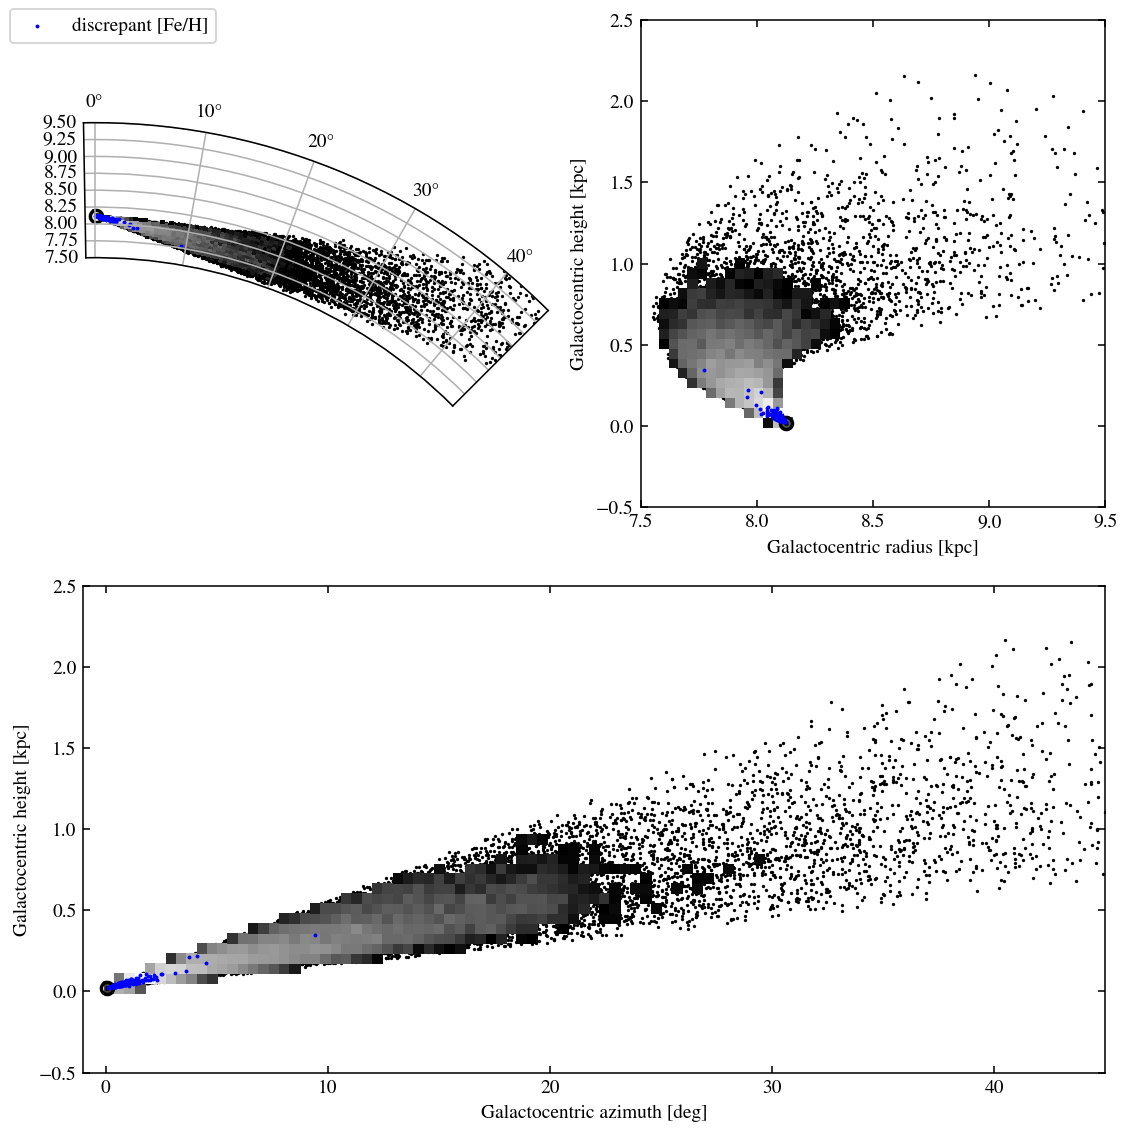

In [119]:
fig, axs = galplot(metals, rad_lim=(7.5, 9.5), lon_lim=(-np.pi/180, np.pi/4), lat_lim=(-0.5, 2.5), show=False)
axs[0].scatter(low_fe['ASTRONN_galphi'], low_fe['ASTRONN_galr'], c='b', s=1, label='discrepant [Fe/H]')
axs[1].scatter(low_fe['ASTRONN_galr'], low_fe['ASTRONN_galz'], c='b', s=1)
axs[2].scatter(low_fe['ASTRONN_galphi']*180/np.pi, low_fe['ASTRONN_galz'], c='b', s=1)
fig.legend(loc='upper left')
plt.show()

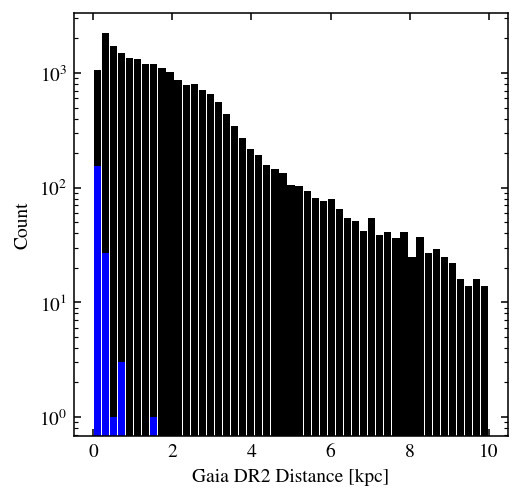

In [7]:
fig, ax = plt.subplots()
bins = np.linspace(0, 10, 50)
ax.hist(get_gaia_cmd(metals)['GAIA_DIST_DR2']/1000, color='k', rwidth=0.9, bins=bins)
ax.hist(get_gaia_cmd(low_fe)['GAIA_DIST_DR2']/1000, color='b', rwidth=0.9, bins=bins)
ax.set_yscale('log')
ax.set_xlabel('Gaia DR2 Distance [kpc]')
ax.set_ylabel('Count')
plt.show()

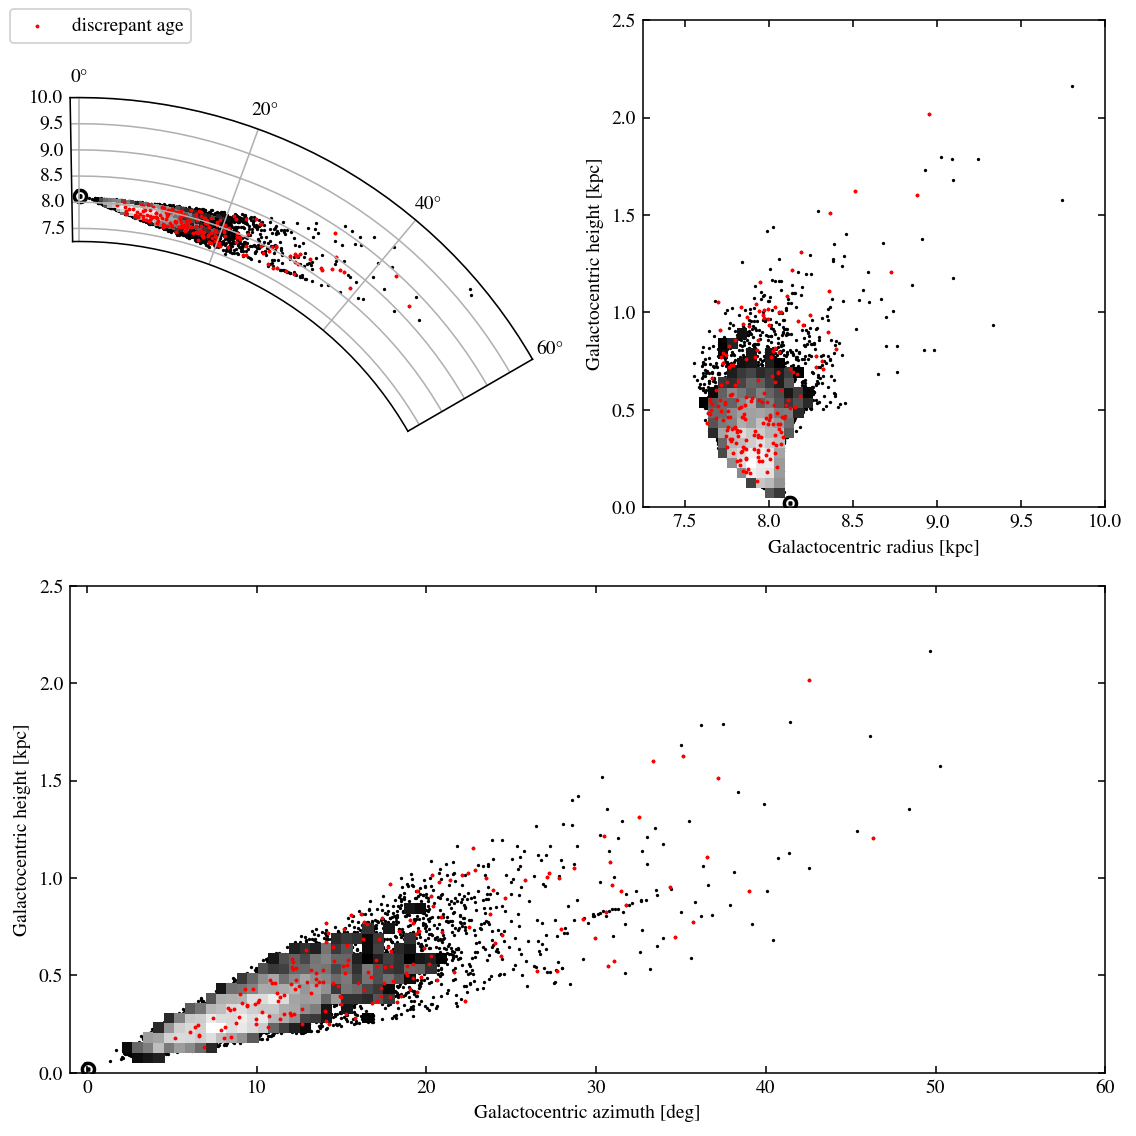

In [124]:
fig, axs = galplot(ages, rad_lim=(7.25, 10), lon_lim=(-np.pi/180, np.pi/3), lat_lim=(0, 2.5), show=False)
axs[0].scatter(low_age['ASTRONN_galphi'], low_age['ASTRONN_galr'], c='r', s=1, label='discrepant age')
axs[1].scatter(low_age['ASTRONN_galr'], low_age['ASTRONN_galz'], c='r', s=1)
axs[2].scatter(low_age['ASTRONN_galphi']*180/np.pi, low_age['ASTRONN_galz'], c='r', s=1)
fig.legend(loc='upper left')
plt.show()

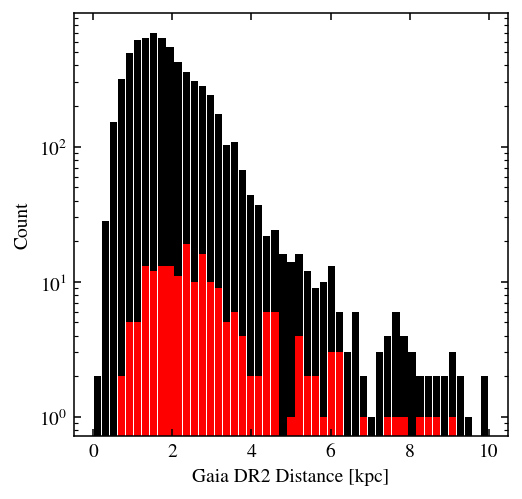

In [9]:
fig, ax = plt.subplots()
bins = np.linspace(0, 10, 50)
ax.hist(get_gaia_cmd(ages)['GAIA_DIST_DR2']/1000, color='k', rwidth=0.9, bins=bins)
ax.hist(get_gaia_cmd(low_age)['GAIA_DIST_DR2']/1000, color='r', rwidth=0.9, bins=bins)
ax.set_yscale('log')
ax.set_xlabel('Gaia DR2 Distance [kpc]')
ax.set_ylabel('Count')
plt.show()